# Forward  Stepwise Selection

In [11]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,adjusted_rand_score

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Credit.csv',index_col=0)
print(data.shape)
data.head()

(400, 11)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
gender_encoding = {'Male':1,'Female':0}
ethnicity = pd.get_dummies(data['Ethnicity'],drop_first=True)
yes_no_encoding = {'Yes':1,'No':0}

In [4]:
data['Gender'] = data['Gender'].map(gender_encoding)
data['Student'] = data['Student'].map(yes_no_encoding)
data['Married'] = data['Married'].map(yes_no_encoding)
data.drop('Ethnicity',axis = 1,inplace = True)
data = pd.concat([data,ethnicity],axis = 1)

In [5]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0
3,104.593,7075,514,4,71,11,1,0,0,580,1,0
4,148.924,9504,681,3,36,11,0,0,0,964,1,0
5,55.882,4897,357,2,68,16,1,0,1,331,0,1


In [6]:
features = [col for col in data.columns if not col == 'Balance']

In [7]:
def forward_stepwise_selection(data,target):
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns if not col == target]
    for i in range(1,len(data.columns)):
        best_score = 0;best_feature = None
        for feature in remaining_features:

            X = total_features[i-1] + [feature]
            model = LinearRegression().fit(data[X],data[target])
            score = r2_score(data[target],model.predict(data[X]))
#             print('For len {}, feature - {}, score is {}'.format(i,feature,score))

            if score > best_score:
                best_score = score
                best_feature = feature
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    return total_features,score_dict

In [8]:
total_predictors,score_dict = forward_stepwise_selection(data,'Balance')

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Forward Selection')

<Figure size 864x432 with 0 Axes>

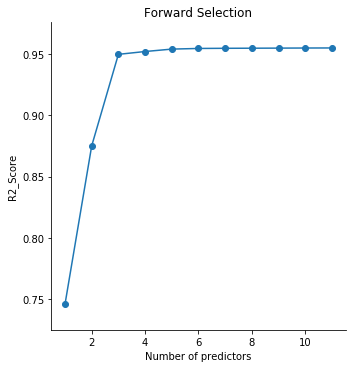

In [9]:
temp = pd.DataFrame({'Number of predictors':list(score_dict.keys()),'R2_Score':list(score_dict.values())})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'Number of predictors' , 'R2_Score')
g.map(plt.plot, 'Number of predictors', 'R2_Score')
plt.title('Forward Selection')

In [12]:
for i,feature in enumerate(total_predictors):
    print('Subset of size {} is'.format(i), feature)

Subset of size 0 is []
Subset of size 1 is ['Rating']
Subset of size 2 is ['Rating', 'Income']
Subset of size 3 is ['Rating', 'Income', 'Student']
Subset of size 4 is ['Rating', 'Income', 'Student', 'Limit']
Subset of size 5 is ['Rating', 'Income', 'Student', 'Limit', 'Cards']
Subset of size 6 is ['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age']
Subset of size 7 is ['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender']
Subset of size 8 is ['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Asian']
Subset of size 9 is ['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Asian', 'Married']
Subset of size 10 is ['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Asian', 'Married', 'Caucasian']
Subset of size 11 is ['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Asian', 'Married', 'Caucasian', 'Education']


# Choosing the best model

In [19]:
score_dict = {}
for i,feature in enumerate(total_predictors[1:]):
    X = data[feature]
    y = data['Balance']
    X = sm.add_constant(X)
    result = sm.OLS(y, X).fit()
    score_dict[i+1] = result.rsquared_adj

Text(0.5, 1, 'Chossing the best model')

<Figure size 864x432 with 0 Axes>

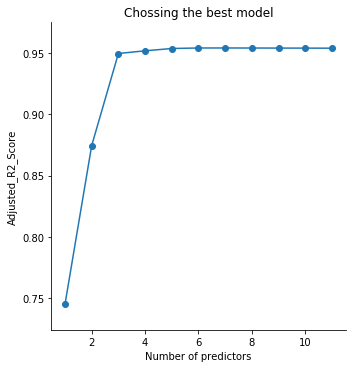

In [21]:
temp = pd.DataFrame({'Number of predictors':list(score_dict.keys()),'Adjusted_R2_Score':list(score_dict.values())})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'Number of predictors' , 'Adjusted_R2_Score')
g.map(plt.plot, 'Number of predictors', 'Adjusted_R2_Score')
plt.title('Chossing the best model')

In [23]:
score_dict

{1: 0.7452098462445803,
 2: 0.8744888189724805,
 3: 0.9494990734177157,
 4: 0.9517033272701592,
 5: 0.9535788787498292,
 6: 0.9539960984035273,
 7: 0.9540098163629883,
 8: 0.9539649480880468,
 9: 0.9539242850304841,
 10: 0.9538912342742093,
 11: 0.9538286695430547}